# Predictive ML Project
- 🖤  Author : [Hailey Hanson](https://github.com/haileylhanson/)
- 🖤  Repository : [datafun-07-ml](https://github.com/haileylhanson/datafun-07-ml)
- 🖤  Date : October 2025 
- 🖤  Purpose : Intro to Data Science: Time Series and Simple Linear Regression to predict New York City's average January high temperatures. 

### Imports

In [181]:
import sys
print(sys.executable)

/Users/haileyhanson/Repos/.venv/bin/python


In [182]:
import sys
!{sys.executable} -m pip install scipy


In [183]:
#Imports
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.axes import Axes
from scipy import stats


## Part 1 - Chart a Straight Line

In [184]:
# use Pandas DataFrames to plot Celsius vs Fahrenheit 

c = lambda f: 5/9 * (f-32)
temps = [(f, c(f)) for f in range (0, 101, 10)]


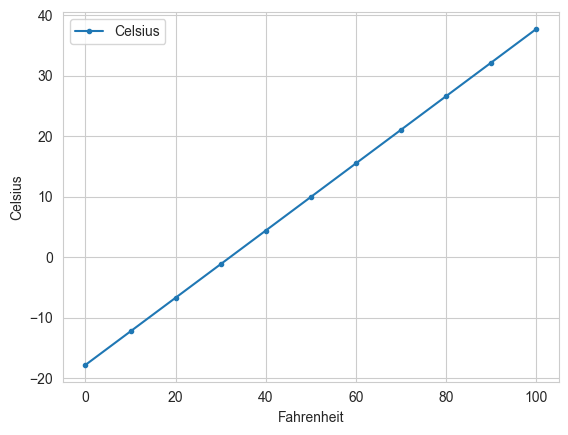

In [185]:

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')



## Part 2 - Prediction

### Section 1 - Data Acquisition

In [186]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection

In [187]:

nyc.head(3)
nyc.tail

<bound method NDFrame.tail of        Date  Value  Anomaly
0    189501   34.2     -3.2
1    189601   34.7     -2.7
2    189701   35.5     -1.9
3    189801   39.6      2.2
4    189901   36.4     -1.0
..      ...    ...      ...
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3

[124 rows x 3 columns]>

### Section 3 - Data Cleaning

In [188]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date.dtype

dtype('int64')

### Section 4 - Descriptive Statistics

In [189]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [190]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)


In [191]:
print("Slope : ")
linear_regression.slope



Slope : 


np.float64(0.00014771361132966162)

In [192]:
print("Intercept : ")
linear_regression.intercept

Intercept : 


np.float64(8.694845520062962)

### Section 6 - Predict

### 🖤 y = mx + b

In [193]:
print("Average high temp in Jan 2024 : ")
linear_regression.slope * 2024 + linear_regression.intercept

Average high temp in Jan 2024 : 


np.float64(8.993817869394197)

In [194]:
print("2019 : ")
linear_regression.slope * 2019 + linear_regression.intercept

2019 : 


np.float64(8.993079301337549)

In [195]:
print("1890 : ")
linear_regression.slope * 1890 + linear_regression.intercept

1890 : 


np.float64(8.974024245476024)

### Section 7 - Visualizations

(10.0, 70.0)

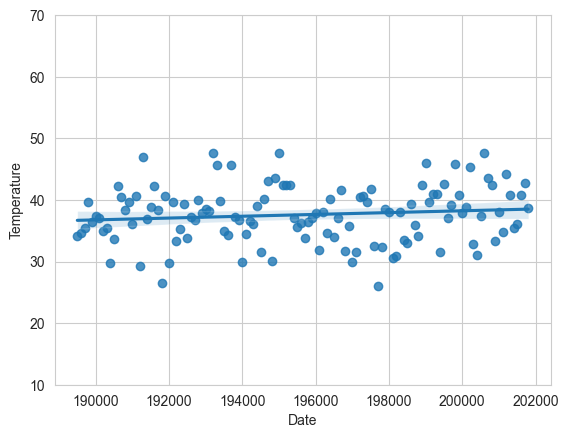

In [196]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

### Part 3 - Prediction

### Part 4 - Insights